<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-(bottom-up-method)" data-toc-modified-id="Introduction-(bottom-up-method)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction (bottom up method)</a></span></li><li><span><a href="#Script-setup" data-toc-modified-id="Script-setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Script setup</a></span></li><li><span><a href="#Data-directory-preparention" data-toc-modified-id="Data-directory-preparention-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data directory preparention</a></span></li><li><span><a href="#Data-file-preparation" data-toc-modified-id="Data-file-preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data file preparation</a></span><ul class="toc-item"><li><span><a href="#input-directory-(all-general-raw-data-files)" data-toc-modified-id="input-directory-(all-general-raw-data-files)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><code>input</code> directory (all general raw data files)</a></span></li><li><span><a href="#input/Bottom_up_method-directory-(all-necessary-raw-data-files-for-the-bottom-up-method)" data-toc-modified-id="input/Bottom_up_method-directory-(all-necessary-raw-data-files-for-the-bottom-up-method)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><code>input/Bottom_up_method</code> directory (all necessary raw data files for the bottom up method)</a></span></li></ul></li><li><span><a href="#Load-data-functions" data-toc-modified-id="Load-data-functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Load data functions</a></span></li><li><span><a href="#Load-data-sets" data-toc-modified-id="Load-data-sets-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Load data sets</a></span></li><li><span><a href="#Emission-factor-calculation-method" data-toc-modified-id="Emission-factor-calculation-method-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Emission factor calculation method</a></span><ul class="toc-item"><li><span><a href="#Data-preperation" data-toc-modified-id="Data-preperation-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Data preperation</a></span></li><li><span><a href="#Power-plant-side-generation-and-emissions" data-toc-modified-id="Power-plant-side-generation-and-emissions-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Power plant side generation and emissions</a></span></li><li><span><a href="#Estimating-heat-via-Free-Allocation" data-toc-modified-id="Estimating-heat-via-Free-Allocation-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Estimating heat via Free Allocation</a></span></li><li><span><a href="#Emission-factor-per-power-plant" data-toc-modified-id="Emission-factor-per-power-plant-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Emission factor per power plant</a></span><ul class="toc-item"><li><span><a href="#Validation-of-emission-factor-per-power-plant" data-toc-modified-id="Validation-of-emission-factor-per-power-plant-7.4.1"><span class="toc-item-num">7.4.1&nbsp;&nbsp;</span>Validation of emission factor per power plant</a></span></li></ul></li><li><span><a href="#Emission-factor-per-technology-and-country" data-toc-modified-id="Emission-factor-per-technology-and-country-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Emission factor per technology and country</a></span></li><li><span><a href="#Emission-factor-per-country" data-toc-modified-id="Emission-factor-per-country-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Emission factor per country</a></span></li></ul></li><li><span><a href="#Validation-of-calculated-emission-factors" data-toc-modified-id="Validation-of-calculated-emission-factors-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Validation of calculated emission factors</a></span><ul class="toc-item"><li><span><a href="#Validation-threshold-for-EF-per-technology-and-country" data-toc-modified-id="Validation-threshold-for-EF-per-technology-and-country-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Validation threshold for EF per technology and country</a></span></li></ul></li><li><span><a href="#Evaluation-of-EF-data-set" data-toc-modified-id="Evaluation-of-EF-data-set-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Evaluation of EF data set</a></span><ul class="toc-item"><li><span><a href="#Evaluation-table" data-toc-modified-id="Evaluation-table-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Evaluation table</a></span></li></ul></li><li><span><a href="#Export-final-EF-to-csv" data-toc-modified-id="Export-final-EF-to-csv-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Export final EF to csv</a></span></li></ul></div>

# Introduction (bottom up method)

In this script, we determine country specific emission factors (EF) for different generation technologies. The calculated EF per technology are based on an bottom up method, that uses the hourly power plant generation data and yearly published emission data.

The used method follows the idea to calculated a EF for individual power plants. In a late step the country specific EF per technology are determined by taking the EF from a representative sample of power plant emissions and generations in the respective country.

The method was applied for data from year 2018.

# Script setup

In [1]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter 

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [15, 10]

#helpers
from helpers import load_timeseries_ENTSOE

# Data directory preparention

Create input, processed and output folders if they don't exist.

If the paths are relative, the corresponding folders will be created inside the current working directory.
- input -> all needed input data
- processed -> save point and exchange with other scripts
- output -> final emission factors

In [2]:
input_directory_path = os.path.join('input')
Bootom_up_methode_input_directory_path = os.path.join('input', 'Bootom_up_methode')
processed_directory_path = 'processed'
output_directory_path = os.path.join('output')

os.makedirs(input_directory_path, exist_ok=True)
os.makedirs(Bootom_up_methode_input_directory_path, exist_ok=True)
os.makedirs(processed_directory_path, exist_ok=True)
os.makedirs(output_directory_path, exist_ok=True)

# Data file preparation

## `input` directory (all general raw data files)

- 1) ENTSO-E production per type

Production per type from ENTSO-E
Original data: ENTSO-E Transparency Platform, Actual Generation per Production Type Available online: 
https://transparency.entsoe.eu/generation/r2/actualGenerationPerProductionType/show
Processed with the following script that converts the data to hourly resolution (private script from INATECH):

 File - > time_series_60min_multiindex.csv -> generation per technology
 
- 2) ENTSO-E production per unit

Production per Unit from ENTSO-E
Original data: ENTSO-E Transparency Platform, Actual Generation per Generation Unit Available online: https://transparency.entsoe.eu/generation/r2/actualGenerationPerGenerationUnit/show (accessed on Apr 29, 2020).
Processed with the following script that converts the data to hourly resolution (private script from INATECH):
https://github.com/INATECH-CIG/entso-e_GenerationOutputPerUnit

File - > gen_data.csv -> hourly generation data per unit

File - > unit_data.csv -> information about the generation units



In [3]:
# Checks if the the input directories are empty or not
# Checks all filenames in the input directory
if not os.listdir(input_directory_path) :
    print("The directory for the bootom up method is empty. Please provide the data to the directory as described in the instructions above.")

filenames = [os.path.join(input_directory_path, fn) for fn in os.listdir(input_directory_path)]

print(filenames)

['input\\Bootom_up_methode', 'input\\CO2_Signal', 'input\\ember_EF.csv', 'input\\entso.csv', 'input\\entsoe-statistical-factsheet-2018-stacked.csv', 'input\\entsoe_gen_type_hourly_table.csv', 'input\\entso_gen_type_hourly_table_scaled.csv', 'input\\entso_scaled.csv', 'input\\gen_data_2015.csv', 'input\\gen_data_2016.csv', 'input\\gen_data_2017.csv', 'input\\gen_data_2018.csv', 'input\\Matching', 'input\\MDV_table.csv', 'input\\time_series_60min_multiindex.csv', 'input\\top_down_methode', 'input\\unit_data_2015.csv', 'input\\unit_data_2016.csv', 'input\\unit_data_2017.csv', 'input\\unit_data_2018.csv']


## `input/Bottom_up_method` directory (all necessary raw data files for the bottom up method)

Based on the developed method the following data sets are needed:

- 1) Matcher for power plants in ENTSO-E and EUTL data sets for Europe

The matching was performed by a manual process (see description).

File - > Matching_Entso_EUTL_EU.csv

- 2) EU Emissions Data (EUTL)

Data are provided in the report section of the following web side:
https://ec.europa.eu/clima/policies/ets/registry_en#tab-0-1

For example: ->Documentation->Reports->Verified Emissions for 2019

File - > "Verified Emissions for 2019" -> verified_emissions_2018_en.xlsx -> converted to .csv

In [4]:
# Checks if the the input directories are empty or not
# Checks all filenames in the input directory

if not os.listdir(Bootom_up_methode_input_directory_path) :
    print("The directory for the bootom up method is empty. Please provide the data to the directory as described in the instructions above.")


filenames = [os.path.join(Bootom_up_methode_input_directory_path, fn) for fn in os.listdir(Bootom_up_methode_input_directory_path)]

print(filenames)

['input\\Bootom_up_methode\\matching_ENTSOE_EU_ETS.csv', 'input\\Bootom_up_methode\\verified_emissions_2018_en.csv', 'input\\Bootom_up_methode\\verified_emissions_2018_en.xlsx', 'input\\Bootom_up_methode\\~$verified_emissions_2018_en.xlsx']


# Load data functions

In [5]:
def change_ENTSOE_ProductionTypeName (ProductionTypeName):
    """
    Converts ENTSO-E ProductionTypeNames into INATECH technology type names.

    Parameters
    ----------
    ProductionTypeName : string
        DESCRIPTION.

    Returns
    -------
    string
        DESCRIPTION.

    """
    return ProductionTypeName.replace({
            'Fossil Hard coal': 'hard_coal', 
            'Fossil Brown coal/Lignite': 'lignite', 
            'Fossil Gas': 'gas',
            'Fossil Coal-derived gas': 'other_fossil',
            'Fossil Peat': 'other_fossil',
            'Nuclear': 'nuclear',
            'Biomass': 'biomass',
            'Waste': 'waste',
            'Geothermal': 'other_renewable',
            'Marine': 'other_renewable',
            'Other': 'other_fossil',
            'Hydro Pumped Storage': 'hydro',
            'Hydro Run-of-river and poundage': 'hydro',
            'Hydro Water Reservoir': 'hydro',
            'Fossil Oil': 'other_fossil',
            'Fossil Oil shale': 'other_fossil', 
            'Solar': 'solar',
            'Wind Onshore': 'wind_onshore',
            'Wind Offshore': 'wind_offshore',
            'Other renewable': 'other_renewable'}, inplace = False)

In [6]:
def load_matching_data_EU(path, fn):
    """
    Load the matching list for EU power plants with ENTSO-E identifier and the EUTL identifier.
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    df = pd.read_csv(os.path.join(path, fn), sep = ',', header = 0, index_col=0)

    return df

def load_EUTL_data(path, fn):
    """
    Load the EU emission data (EUTL).
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    df = pd.read_csv(os.path.join(path, fn),sep = ';', header = 13, encoding='ISO-8859-1')

    return df

def load_generation_per_unit(path, fn):
    """
    Load the ENTSO-E gernation per unit data.
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    generation = pd.read_csv(os.path.join(path, fn),sep = ',',index_col=0,parse_dates=True)
    
    return generation

def load_unit_info(path, fn):
    """
    Load the ENTSO-E generation unit information.
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    df = pd.read_csv(os.path.join(path, fn),sep = ',',index_col=0)
    
    # Rename production type name according to own convention
    df.ProductionTypeName = change_ENTSOE_ProductionTypeName(df.ProductionTypeName)
    
    # set name for the index
    df.index.set_names('GenerationUnitEIC', inplace=True)

    return df

# Load data sets

#### Load power plant generation data

In [7]:
generation_per_unit_2018 = load_generation_per_unit(input_directory_path, 'gen_data_2018.csv')

#### Load power plant unit inforamtion (capacity, name, etc.)

In [8]:
generation_unit_info = load_unit_info(input_directory_path, 'unit_data_2018.csv')

#### Load CO2_emissions data from EUTL dataset

In [9]:
EUTL_emissions = load_EUTL_data(Bootom_up_methode_input_directory_path, 'verified_emissions_2018_en.csv')

#### Load machting information for power plant data

In [10]:
unit_matching_EU = load_matching_data_EU(Bootom_up_methode_input_directory_path, 'matching_ENTSOE_EU_ETS.csv')

# Emission factor calculation method

In the following, the EF are calculated step by step. Starting with the matching of the data sets up to the short evaluation of the results.

## Data preperation

#### Yearly power generation per unit

Store the yearly generation per power plant to the power plant information data set.

In [11]:
generation_unit_info['generation_2018'] = generation_per_unit_2018.sum()

#### Matching ENTSO-E ID and EUTL ID

Combining matching information (ENTSO-E ID and EUTL ID) to the generation unit info. Keep only matched information.

In [12]:
generation_unit_info_matched = pd.merge(generation_unit_info, unit_matching_EU, left_on='GenerationUnitEIC', right_on='eic_g', how='inner')

#### Connecting emissions data to the generation data

Create a unique identifier from the country code and the plant ID in the emission data set and generation unit data set.

In [13]:
generation_unit_info_matched['Unique_ID'] = generation_unit_info_matched.EUTL_countrycode + generation_unit_info_matched.EUTL_ID.astype(str)
EUTL_emissions['Unique_ID'] = EUTL_emissions.REGISTRY_CODE + EUTL_emissions.INSTALLATION_IDENTIFIER.astype(int).astype(str)

Merge both datasets and set index to EIC_P

In [14]:
generation_unit_info_matched = generation_unit_info_matched.merge(EUTL_emissions, left_on='Unique_ID', right_on='Unique_ID', how='inner')

In [15]:
generation_unit_info_matched.set_index('eic_g', inplace=True)

## Power plant side generation and emissions

The following function is used to calculate the electricity generation per side. This is done due to the fact, that the EUTL data set has a spatial resolution on site level and not on power plant level it can happen, that power plants data need to be aggregated together in the emission calculation.


In [16]:
def calc_side_gen(df, year):
    # calculate the electricity generation per side.
    side_generation = df.groupby(['EUTL_countrycode','EUTL_ID']).sum()['generation_' + str(year)].reset_index()
    
    # add side generation to PP dataset
    df['side_generation_' + str(year)] = df.apply(lambda x: side_generation.query('EUTL_countrycode == @x.EUTL_countrycode')\
                                                              .query('EUTL_ID == @x.EUTL_ID').iloc[0,2],axis = 1)
    
    return df

In [17]:
# list for years to be calculated
years = [2018]

for i in years:
    generation_unit_info_matched = calc_side_gen(generation_unit_info_matched, i)

## Estimating heat via Free Allocation

To estimate the amount of CO2 allowances that can be allocated to the heat production of a power plant, the entry "Free Allocation" is used. The plant operators receive free allowances in relation to the amount of heat they produce. This share is reduced by 10% every year until 2020, starting with 100% for the year 2013. In 2020 they only receive 30% of the required allowances for heat production. Since the amount of CO2 is not directly determined by the produced heat, instead a standard emission factor (benchmark process) is used to determine the amount, which only provides a rough estimate.

In [18]:
# data type preparation 
for i in years:
    generation_unit_info_matched['ALLOCATION_' + str(i)] = generation_unit_info_matched['ALLOCATION_' + str(i)].apply(str)
    generation_unit_info_matched['ALLOCATION_' + str(i)].replace({'Excluded' : 0}, inplace = True)
    generation_unit_info_matched['ALLOCATION_' + str(i)].replace({'-1' : 0}, inplace = True)
    generation_unit_info_matched['ALLOCATION_' + str(i)] = generation_unit_info_matched['ALLOCATION_' + str(i)].apply(float)
    generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)] = generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)].apply(str)
    generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)].replace({'Excluded' : 0}, inplace = True)
    generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)].replace({'-1' : 0}, inplace = True)
    generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)] = generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)].apply(float)

Estimating heat via Free Allocation, in 2018 only 50% was free for public heat generation.

In [19]:
for i in years:
    generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)] = generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)] - ((generation_unit_info_matched['ALLOCATION_' + str(i)] / 50) * 100)

## Emission factor per power plant

Calculates emissions and EF for each PP.

In [20]:
for i in years:
    generation_unit_info_matched['PP_emissions_' + str(i)] = (generation_unit_info_matched['VERIFIED_EMISSIONS_' + str(i)] / generation_unit_info_matched['side_generation_' + str(i)]) * generation_unit_info_matched['generation_' + str(i)] 
    generation_unit_info_matched['PP_EF' + str(i)] = generation_unit_info_matched['PP_emissions_' + str(i)] / generation_unit_info_matched['generation_' + str(i)]

Show first 5 entries from data.

Attention, the verified_emissions_* per power plant are always site-related (eic_p), if there are several power plants at one site, the emissions have to be distributed among the power plants. (see. PP_emissions)

In [21]:
generation_unit_info_matched.head(5)

,AreaCode,AreaName,AreaTypeCode,InstalledGenCapacity,MapCode,PowerSystemResourceName,ProductionTypeName,ProductionUnitEIC,duplicate_count,generation_2018,...,ALLOCATION_2010,VERIFIED_EMISSIONS_2010,ALLOCATION_2009,VERIFIED_EMISSIONS_2009,ALLOCATION_2008,VERIFIED_EMISSIONS_2008,ACCOUNT_CLOSURE,side_generation_2018,PP_emissions_2018,PP_EF2018
eic_g,,,,,,,,,,,,,,,,,,,,,
14W-GEN-LAU----Z,10YAT-APG------L,APG CA,CTA,140.0,AT,Lau GuD,gas,14W-PROD-LAU---8,2.0,0.00,...,304721,206265,304721,118982,304721,256284,OPEN,0.00,NaN,NaN
14WENERGIEAGWT4S,10YAT-APG------L,APG CA,CTA,400.0,AT,Kraftwerk Timelkam GUD,gas,14WENERGIE--WT02,2.0,685235.67,...,681283,580029,681283,340026,218704,103553,OPEN,685235.67,254778.000000,0.371811
14W-KW-DUE-EVN-A,10YAT-APG------L,APG CA,CTA,332.0,AT,KW Dürnrohr Block 2,hard_coal,14W-KW-DU2-EVN-K,2.0,745290.41,...,1139438,1592747,1139438,899251,1139438,1435406,OPEN,745290.41,0.000000,0.000000
14WENERGIEAGWR21,10YAT-APG------L,APG CA,CTA,150.0,AT,KW Riedersbach 2 G2,hard_coal,14WENERGIEAGWR05,2.0,0.00,...,437140,310019,437140,342118,437140,730397,OPEN,0.00,NaN,NaN
45W000000000029I,10Y1001A1001A796,Energinet CA,CTA,250.0,DK,Avedoerevaerket 1,biomass,45V0000000000091,1.0,646873.95,...,1763671,1625381,1763671,1772512,1763673,1890106,OPEN,2025224.37,-143410.918928,-0.221698


### Validation of emission factor per power plant

Check and test the resulting EF. Drop EFs that are not plausible.

Which technologies are covered in the data set?

In [22]:
generation_unit_info_matched.ProductionTypeName.unique()

array(['gas', 'hard_coal', 'biomass', 'other_fossil', 'lignite'],
      dtype=object)

Take only the following technologies:

In [23]:
tech = ['gas', 'hard_coal', 'lignite', 'other_fossil']
generation_unit_info_matched = generation_unit_info_matched.query('ProductionTypeName in @tech')

Since not all emission factors are correctly calculated we limited the list of calculated EF by performing a plausibility check. We are using numbers from the UBA and added a treshold of plus minus 50%.

UBA:
https://www.umweltbundesamt.de/sites/default/files/medien/1410/publikationen/2020-04-01_climate-change_13-2020_strommix_2020_fin.pdf

Some other comparison numbers:
https://www.gegenwind-saarland.de/Materialien/Energiewende/071031--VdI---CO2-Emissionen%20der%20Stromerzeugung_01.pdf

In [24]:
# emissions space per technology in [t CO2/MWh] 

emission_space = {"lignite": (1.635,0.545),
                  "hard_coal": (1.230,0.410),
                  "gas": (0.555,0.185),
                  "other_fossil": (2.250,0.750)}

In [25]:
# function for EF check
def check_EF (PP_EF, ProductionTypeName):
    if PP_EF > emission_space[ProductionTypeName][1] and PP_EF < emission_space[ProductionTypeName][0]:
        return True
    else:
        return False  

In [26]:
# apply check_EF function for EF validation
for i in years:
    generation_unit_info_matched['EF_' + str(i) + '_validation'] = generation_unit_info_matched.apply(lambda x: check_EF(x['PP_EF' + str(i)], x['ProductionTypeName']), axis=1)

Limit the results to validated data

In [27]:
# for more years using -> & [(generation_unit_info_matched.EF_2016_validation == True) & (generation_unit_info_matched.EF_2018_validation == True)]
generation_unit_info_validated = generation_unit_info_matched[(generation_unit_info_matched.EF_2018_validation == True)]

Since the calculation is based on some assumptions, as a result, the EF may be incorrect. In the following we list the three most important points:

1.) Match of generation and emission data is not correct

2.) Data is wrong or incomplete

3.) Match is correct, but it's a highly aggregated facility such like a steel manufacturing factory, where both process-CO2 AND the emissions from the power plant running the process accounts into the number given in the dataset.

4.) the facility contains more smaller power plants which are not covered by ENTSO-E (<100MW) but nevertheless produce emissions which need to be paid for.

5.) if the number of the carbon-intensity is negative, then the dataset is explained as " -1 = blank (No allocation has been made / No Emissions have been Verified)"

#### Plot EF per technology

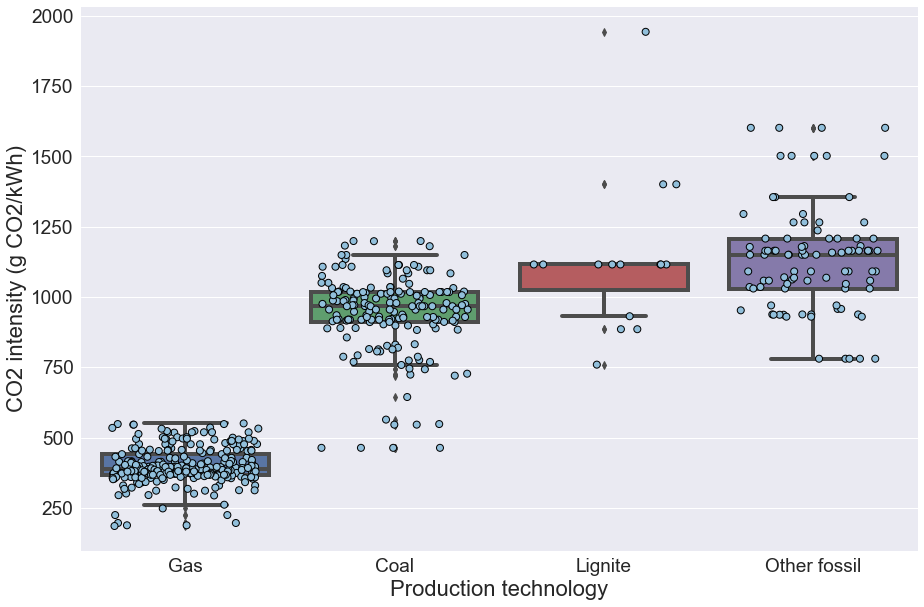

In [28]:
generation_unit_info_validated_plot = generation_unit_info_validated[['ProductionTypeName','PP_EF2018','EUTL_countrycode']].copy()

# convert to g CO2 / kWh
generation_unit_info_validated_plot.PP_EF2018 = generation_unit_info_validated_plot.PP_EF2018 * 1000

fig, ax = plt.subplots(1, 1)

ax = sns.boxplot(x="ProductionTypeName", y="PP_EF2018", data=generation_unit_info_validated_plot, orient="v", linewidth=4, dodge=True)

ax = sns.stripplot(x="ProductionTypeName", y="PP_EF2018", data=generation_unit_info_validated_plot, color=".25", orient="v", size=7, jitter=0.35, palette=['#91bfdb'],edgecolor='black',
                  linewidth=1, dodge=True)

ax.set_xlabel("Production technology", fontsize=22)
ax.set_ylabel("CO2 intensity (g CO2/kWh)" , fontsize=22)

ax.tick_params(axis='x',labelsize=19)
ax.tick_params(axis='y',labelsize=19)

labels = ['Gas','Coal','Lignite','Other fossil']

ax.set_xticklabels(labels)
pass

In [29]:
fig.savefig(os.path.join(output_directory_path + '/_CO2_intensity_by_technology.png'))

#### Save point

In [30]:
generation_unit_info_validated.to_csv(processed_directory_path + '/generation_unit_EF_bottom_up_methode.csv')

## Emission factor per technology and country

In the following section we calculate a mean EFs for each technology in all countries.

#### EF per technology and country

In [31]:
# grouping generation
generation_per_tech_country = generation_unit_info_validated.groupby(['EUTL_countrycode','ProductionTypeName']).sum()[['generation_2018','PP_emissions_2018']]
# cal. EF per tech and country
EF_per_tech_country = generation_per_tech_country.PP_emissions_2018 / generation_per_tech_country.generation_2018

#### Add technology specific EF for each country to the data set

In [32]:
# reset index
generation_unit_info_validated.reset_index(inplace=True)

# set new index for maping function 
generation_unit_info_EF_tech = generation_unit_info_validated.set_index(['EUTL_countrycode','ProductionTypeName'])

# map the EF to the data set
generation_unit_info_EF_tech['Tech_EF'] = generation_unit_info_EF_tech.index.map(EF_per_tech_country.to_dict())

#reset index
generation_unit_info_EF_tech.reset_index(inplace=True)

#set old index
generation_unit_info_EF_tech.set_index(['eic_g'],inplace=True)

In [33]:
generation_unit_info_EF_tech.head(5)

,EUTL_countrycode,ProductionTypeName,AreaCode,AreaName,AreaTypeCode,InstalledGenCapacity,MapCode,PowerSystemResourceName,ProductionUnitEIC,duplicate_count,...,ALLOCATION_2009,VERIFIED_EMISSIONS_2009,ALLOCATION_2008,VERIFIED_EMISSIONS_2008,ACCOUNT_CLOSURE,side_generation_2018,PP_emissions_2018,PP_EF2018,EF_2018_validation,Tech_EF
eic_g,,,,,,,,,,,,,,,,,,,,,
14WENERGIEAGWT4S,AT,gas,10YAT-APG------L,APG CA,CTA,400.0,AT,Kraftwerk Timelkam GUD,14WENERGIE--WT02,2.0,...,681283,340026,218704,103553,OPEN,685235.67,254778.000000,0.371811,True,0.288711
45W000000000032T,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,147.0,DK,Asnaesvaerket 2,45V000000000011E,1.0,...,1765314,2430356,1765318,2484733,OPEN,770018.30,202216.305002,0.922057,True,0.775840
45W000000000033R,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,640.0,DK,Asnaesvaerket 5,45V000000000011E,1.0,...,1765314,2430356,1765318,2484733,OPEN,770018.30,507784.694998,0.922057,True,0.775840
45W000000000034P,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,250.0,DK,Amagervaerket 3,45V000000000012C,1.0,...,1250992,1684995,1250995,1089604,OPEN,1060165.23,771352.000000,0.727577,True,0.775840
45W000000000040U,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,377.0,DK,Esbjergvaerket 3,45V0000000000164,1.0,...,1051487,1318927,1051489,1158930,OPEN,1193633.83,924609.000000,0.774617,True,0.775840


#### Save point

In [34]:
generation_unit_info_EF_tech.to_csv(processed_directory_path + '/generation_unit_EF_bottom_up_methode.csv')

## Emission factor per country

In the following section we calculate a mean EFs for each country.

#### EF per technology and country

In [35]:
# grouping generation
generation_per_country = generation_unit_info_validated.groupby(['EUTL_countrycode']).sum()[['generation_2018','PP_emissions_2018']]
# cal. EF per country
EF_per_country = generation_per_country.PP_emissions_2018 / generation_per_country.generation_2018

#### Add country specific EF to the data set

In [36]:
# reset index
generation_unit_info_EF_tech.reset_index(inplace=True)

# set new index for maping function 
generation_unit_info_EF_country = generation_unit_info_EF_tech.set_index(['MapCode'])

# map the EF to the data set
generation_unit_info_EF_country['Country_EF'] = generation_unit_info_EF_country.index.map(EF_per_country.to_dict())

#reset index
generation_unit_info_EF_country.reset_index(inplace=True)

#set old index
generation_unit_info_EF_country.set_index(['eic_g'],inplace=True)

In [37]:
generation_unit_info_EF_country.head(5)

,MapCode,EUTL_countrycode,ProductionTypeName,AreaCode,AreaName,AreaTypeCode,InstalledGenCapacity,PowerSystemResourceName,ProductionUnitEIC,duplicate_count,...,VERIFIED_EMISSIONS_2009,ALLOCATION_2008,VERIFIED_EMISSIONS_2008,ACCOUNT_CLOSURE,side_generation_2018,PP_emissions_2018,PP_EF2018,EF_2018_validation,Tech_EF,Country_EF
eic_g,,,,,,,,,,,,,,,,,,,,,
14WENERGIEAGWT4S,AT,AT,gas,10YAT-APG------L,APG CA,CTA,400.0,Kraftwerk Timelkam GUD,14WENERGIE--WT02,2.0,...,340026,218704,103553,OPEN,685235.67,254778.000000,0.371811,True,0.288711,0.344882
45W000000000032T,DK,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,147.0,Asnaesvaerket 2,45V000000000011E,1.0,...,2430356,1765318,2484733,OPEN,770018.30,202216.305002,0.922057,True,0.775840,0.751762
45W000000000033R,DK,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,640.0,Asnaesvaerket 5,45V000000000011E,1.0,...,2430356,1765318,2484733,OPEN,770018.30,507784.694998,0.922057,True,0.775840,0.751762
45W000000000034P,DK,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,250.0,Amagervaerket 3,45V000000000012C,1.0,...,1684995,1250995,1089604,OPEN,1060165.23,771352.000000,0.727577,True,0.775840,0.751762
45W000000000040U,DK,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,377.0,Esbjergvaerket 3,45V0000000000164,1.0,...,1318927,1051489,1158930,OPEN,1193633.83,924609.000000,0.774617,True,0.775840,0.751762


#### Save point

In [38]:
generation_unit_info_EF_country.to_csv(processed_directory_path + '/generation_unit_EF_bottom_up_methode.csv')

# Validation of calculated emission factors

In this section we checking if the underlying generation data that we have used for EF calculation represents the country production adequately. By comparing the used power plant production with the production per production type from ENTSO-E (scaled with ENTSO-E Factsheet data) of each country, we can get an idea how trustful is our resulting EF.

#### Load ENTSO-E generation per type

In [39]:
entsoe_gen_type = pd.read_csv(input_directory_path+'/entso_gen_type_hourly_table_scaled.csv', index_col=[0], header=[0, 1], parse_dates=True).dropna(how="all", axis=0)

Show the head of the data (the data is using a multi index for the columns)

In [40]:
entsoe_gen_type.head(5)

region                         AT                                      \
variable                  biomass        gas   hard_coal        hydro   
utc_timestamp                                                           
2018-01-01 00:00:00+00:00   316.0  85.185998  189.813350  3633.105979   
2018-01-01 01:00:00+00:00   316.0  83.986195  188.547928  3557.076855   
2018-01-01 02:00:00+00:00   316.0  82.786393  188.547928  3439.774779   
2018-01-01 03:00:00+00:00   316.0  86.385801  188.547928  3432.171866   
2018-01-01 04:00:00+00:00   316.0  89.985209  188.547928  3616.814024   

region                                                               \
variable                  other_fossil other_renewable solar  waste   
utc_timestamp                                                         
2018-01-01 00:00:00+00:00   376.712329             NaN   0.0  100.0   
2018-01-01 01:00:00+00:00   376.712329             NaN   0.0  100.0   
2018-01-01 02:00:00+00:00   376.712329             NaN   0.0  100.0   
2018-01-01 03:00:00+00:00   376.712329             NaN   0.0  100.0   
2018-01-01 04:00:00+00:00   376.712329             NaN   0.0  100.0   

region                                          BE  ...           SI  \
variable                  wind_onshore     biomass  ... wind_onshore   
utc_timestamp                                       ...                
2018-01-01 00:00:00+00:00        832.0  310.564338  ...         0.70   
2018-01-01 01:00:00+00:00        926.0  205.181412  ...         0.61   
2018-01-01 02:00:00+00:00        692.0  178.621922  ...         0.57   
2018-01-01 03:00:00+00:00        453.0  175.522424  ...         0.62   
2018-01-01 04:00:00+00:00        321.0  175.362106  ...         0.56   

region                            SK                                     \
variable                     biomass         gas  hard_coal       hydro   
utc_timestamp                                                             
2018-01-01 00:00:00+00:00  75.757569  223.815846  71.307423  490.635794   
2018-01-01 01:00:00+00:00  75.488926  220.374486  71.159174  497.114042   
2018-01-01 02:00:00+00:00  75.488926  206.609047  69.231947  552.469700   
2018-01-01 03:00:00+00:00  79.787227  178.823253  67.156471  632.576139   
2018-01-01 04:00:00+00:00  79.249940  182.901901  68.787202  605.737684   

region                                                                        
variable                  lignite nuclear other_fossil other_renewable solar  
utc_timestamp                                                                 
2018-01-01 00:00:00+00:00   179.5  1819.3        478.8            41.4   0.0  
2018-01-01 01:00:00+00:00   177.9  1816.7        475.8            41.0   0.0  
2018-01-01 02:00:00+00:00   174.7  1808.7        469.5            40.8   0.0  
2018-01-01 03:00:00+00:00   168.5  1803.6        455.6            39.4   0.0  
2018-01-01 04:00:00+00:00   170.6  1809.1        461.5            40.4   0.0  

[5 rows x 214 columns]

#### Filter the data

Taking only countries that are covert from our method and use the generation from one year.

In [41]:
#country filter
entsoe_gen_type = entsoe_gen_type[generation_unit_info_validated.EUTL_countrycode.unique()]
# take the sum of the generation
entsoe_gen_type = entsoe_gen_type.sum()

Reset the multiindex from pandas

In [42]:
entsoe_gen_type = entsoe_gen_type.reset_index()

Rename column names

In [43]:
entsoe_gen_type = entsoe_gen_type.rename(columns={0:'generation_per_type_2018_ENTSO-E','region':'MapCode','variable':'ProductionTypeName'})

#### Production for each technology form power plant generation

In [44]:
Powerplants_gen_type_year = pd.DataFrame(generation_unit_info_validated.groupby(['MapCode','ProductionTypeName']).sum()['generation_2018'])

Reset the multiindex from pandas and drop not used columns

In [45]:
Powerplants_gen_type_year = Powerplants_gen_type_year.reset_index()
Powerplants_gen_type_year = Powerplants_gen_type_year.rename(columns={'generation_2018':'verified_generation_per_unit_2018_ENTSO-E'})

#### Merge power plant generation and ENTSO-E per type

In [46]:
gen_data_comparison = entsoe_gen_type.merge(Powerplants_gen_type_year, on=['MapCode','ProductionTypeName'])

In [47]:
gen_data_comparison['missing_generation'] = gen_data_comparison['generation_per_type_2018_ENTSO-E'] - gen_data_comparison['verified_generation_per_unit_2018_ENTSO-E']

In [48]:
gen_data_comparison['covered_generation'] = round((100 / gen_data_comparison['generation_per_type_2018_ENTSO-E']) * gen_data_comparison['verified_generation_per_unit_2018_ENTSO-E'])

#### Plot covered generation per country and generation type

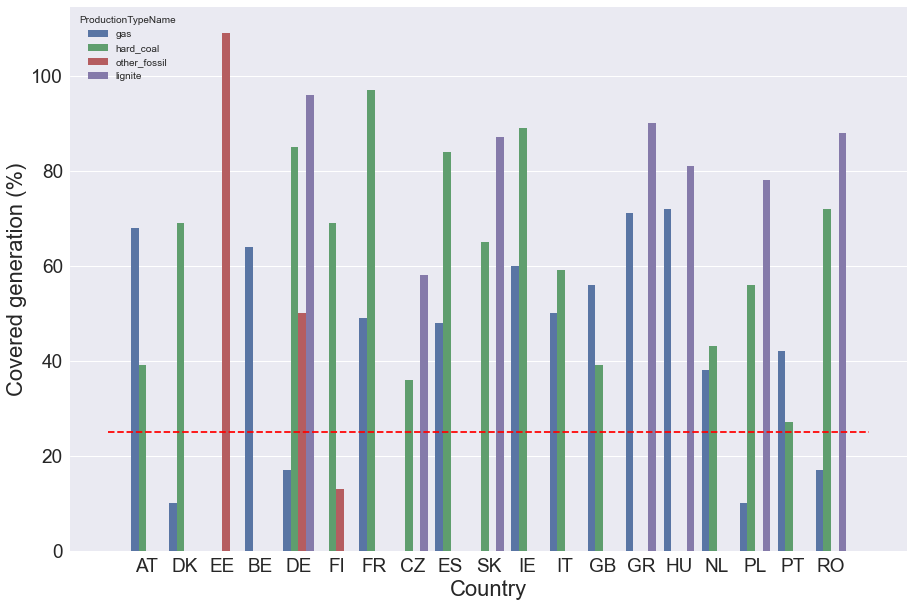

In [49]:
fig, ax = plt.subplots(1, 1)

ax = sns.barplot(x="MapCode", y="covered_generation", hue="ProductionTypeName", data=gen_data_comparison)
ax.plot([-1, 19], [25, 25], 'r--')


ax.set_xlabel("Country", fontsize=22)
ax.set_ylabel("Covered generation (%)" , fontsize=22)

ax.tick_params(axis='x',labelsize=19)
ax.tick_params(axis='y',labelsize=19)

pass

If some technology coverages are above 100%, this is often explained by the fact that the generation units have been assigned to the wrong technology. 

## Validation threshold for EF per technology and country

Add validation identifier to countries and technologies where at least 25 % of the generation is connected to CO2 emissions.

In [50]:
# add identifier
gen_data_comparison['Coverage'] = round(gen_data_comparison['covered_generation'])
gen_data_comparison['Verified_EF'] = (round(gen_data_comparison['covered_generation']) > 25)

In [51]:
# set new index
gen_data_comparison = gen_data_comparison.set_index(['MapCode','ProductionTypeName'])

In [52]:
# take the calculated EF from 7.3 and reset the used index
EF_per_tech_country = EF_per_tech_country.reset_index().rename(columns={0:'EF','EUTL_countrycode':'MapCode'}).set_index(['MapCode','ProductionTypeName'])

In [53]:
# Transfer the verification of EF too the result
EF_per_tech_country['Verified_EF'] = gen_data_comparison['Verified_EF']
EF_per_tech_country['Coverage'] = gen_data_comparison['Coverage']

In [54]:
# EF in gCO2 per kWh
EF_per_tech_country['EF_round_in_gCO2_kwh'] = (EF_per_tech_country.EF * 1000).round(2)

In [55]:
EF_per_tech_country.head(5)

EF Verified_EF  Coverage  \
MapCode ProductionTypeName                                   
AT      gas                 0.288711        True      68.0   
        hard_coal           0.884070        True      39.0   
BE      gas                 0.389641        True      64.0   
CZ      hard_coal           0.985546        True      36.0   
        lignite             0.928296        True      58.0   

                            EF_round_in_gCO2_kwh  
MapCode ProductionTypeName                        
AT      gas                               288.71  
        hard_coal                         884.07  
BE      gas                               389.64  
CZ      hard_coal                         985.55  
        lignite                           928.30

# Evaluation of EF data set 

The following section generates some information to better assess the quality of the result.

In [56]:
# show the columns in the last data set 
generation_unit_info_validated.columns

Index(['eic_g', 'AreaCode', 'AreaName', 'AreaTypeCode', 'InstalledGenCapacity',
       'MapCode', 'PowerSystemResourceName', 'ProductionTypeName',
       'ProductionUnitEIC', 'duplicate_count', 'generation_2018', 'eic_p',
       'EUTL_countrycode', 'EUTL_ID', 'Unique_ID', 'REGISTRY_CODE',
       'IDENTIFIER_IN_REG', 'INSTALLATION_NAME', 'INSTALLATION_IDENTIFIER',
       'PERMIT_IDENTIFIER', 'MAIN_ACTIVITY_TYPE_CODE', 'ALLOCATION_2018',
       'ALLOCATION_RESERVE_2018', 'ALLOCATION_TRANSITIONAL_2018',
       'VERIFIED_EMISSIONS_2018', 'ALLOCATION_2017', 'ALLOCATION_RESERVE_2017',
       'ALLOCATION_TRANSITIONAL_2017', 'VERIFIED_EMISSIONS_2017',
       'ALLOCATION_2016', 'ALLOCATION_RESERVE_2016',
       'ALLOCATION_TRANSITIONAL_2016', 'VERIFIED_EMISSIONS_2016',
       'ALLOCATION_2015', 'ALLOCATION_RESERVE_2015',
       'ALLOCATION_TRANSITIONAL_2015', 'VERIFIED_EMISSIONS_2015',
       'ALLOCATION_2014', 'ALLOCATION_RESERVE_2014',
       'ALLOCATION_TRANSITIONAL_2014', 'VERIFIED_EMISSION

## Evaluation table

In [57]:
def gen_eval_table(generation, matched_generation, validated_generation, val_type):
    
    check_1 = generation.groupby(['MapCode', 'ProductionTypeName']).agg(['sum', 'count'])[val_type]
    check_1.rename(columns={"count": "count_1", "sum":"sum_1"}, inplace=True)
    
    check_2 = generation_unit_info_matched.groupby(['MapCode', 'ProductionTypeName']).agg(['sum', 'count'])[val_type]
    check_2.rename(columns={"count": "count_2",  "sum":"sum_2"}, inplace=True)
    
    check_3 = generation_unit_info_validated.groupby(['MapCode', 'ProductionTypeName']).agg(['sum', 'count'])[val_type]
    check_3.rename(columns={"count": "count_3",  "sum":"sum_3"}, inplace=True)
    
    check_table = check_3.join(check_2).join(check_1)
    
    check_table.sum_3 = (check_table.sum_3 / 1000)
    check_table.sum_2 = (check_table.sum_2 / 1000)
    check_table.sum_1 = (check_table.sum_1 / 1000)
    
    check_table = check_table.round(3)
    
    return check_table


In [58]:
# Evaluation atvle for capacity 
eval_table_cap = gen_eval_table(generation_unit_info, generation_unit_info_matched, generation_unit_info_validated, 'InstalledGenCapacity')

In [59]:
# Join the calculated EF to the evaluation table
eval_table_cap = eval_table_cap.join(EF_per_tech_country)

In [60]:
eval_table_cap.loc["Total"] = eval_table_cap.sum()

In [61]:
eval_table_cap

,sum_3,count_3,sum_2,count_2,sum_1,count_1,EF,Verified_EF,Coverage,EF_round_in_gCO2_kwh
"(AT, gas)",3.508,9.0,3.902,12.0,3.902,12.0,0.288711,True,68.0,288.71
"(AT, hard_coal)",0.200,1.0,0.682,3.0,0.682,3.0,0.884070,True,39.0,884.07
"(BE, gas)",3.936,17.0,4.506,19.0,4.646,20.0,0.389641,True,64.0,389.64
"(CZ, hard_coal)",0.561,3.0,0.748,4.0,0.748,4.0,0.985546,True,36.0,985.55
"(CZ, lignite)",4.119,18.0,5.772,25.0,4.494,21.0,0.928296,True,58.0,928.30
"(DE, gas)",8.427,21.0,17.977,58.0,16.972,53.0,0.334091,False,17.0,334.09
"(DE, hard_coal)",17.724,38.0,24.395,51.0,22.794,48.0,0.871051,True,85.0,871.05
"(DE, lignite)",19.238,34.0,19.590,35.0,19.590,35.0,1.125560,True,96.0,1125.56
"(DE, other_fossil)",0.825,3.0,0.925,4.0,2.341,11.0,1.619695,True,50.0,1619.69
"(DK, gas)",0.108,1.0,0.108,1.0,0.108,1.0,0.329783,False,10.0,329.78


In [62]:
# Evaluation table for genertaion
eval_table_gen = gen_eval_table(generation_unit_info, generation_unit_info_matched, generation_unit_info_validated, 'generation_2018')

In [63]:
# Join the calculated EF to the evaluation table
eval_table_gen = eval_table_gen.join(EF_per_tech_country)

In [64]:
eval_table_gen.loc["Total"] = eval_table_gen.sum()

In [65]:
eval_table_gen

,sum_3,count_3,sum_2,count_2,sum_1,count_1,EF,Verified_EF,Coverage,EF_round_in_gCO2_kwh
"(AT, gas)",6660.371,9.0,7457.226,12.0,7457.226,12.0,0.288711,True,68.0,288.71
"(AT, hard_coal)",693.857,1.0,1439.148,3.0,1439.148,3.0,0.884070,True,39.0,884.07
"(BE, gas)",14216.707,17.0,16372.357,19.0,17181.875,20.0,0.389641,True,64.0,389.64
"(CZ, hard_coal)",1243.426,3.0,1243.426,4.0,1243.426,4.0,0.985546,True,36.0,985.55
"(CZ, lignite)",19775.004,18.0,26607.733,25.0,21876.551,21.0,0.928296,True,58.0,928.30
"(DE, gas)",14844.429,21.0,29445.917,58.0,29024.315,53.0,0.334091,False,17.0,334.09
"(DE, hard_coal)",61792.600,38.0,78632.750,51.0,73274.329,48.0,0.871051,True,85.0,871.05
"(DE, lignite)",129230.488,34.0,129230.488,35.0,129230.488,35.0,1.125560,True,96.0,1125.56
"(DE, other_fossil)",3303.138,3.0,3759.405,4.0,6423.292,11.0,1.619695,True,50.0,1619.69
"(DK, gas)",273.443,1.0,273.443,1.0,273.443,1.0,0.329783,False,10.0,329.78


In [66]:
eval_table_gen.to_csv(output_directory_path + '/evaluation_table_capacities.csv')

In [67]:
eval_table_cap.to_csv(output_directory_path + '/evaluation_table_generation.csv')

# Export final EF to csv

In [68]:
EF_per_tech_country.to_csv(processed_directory_path + '/EF_bottom_up_methode.csv')
EF_per_tech_country.to_csv(output_directory_path + '/EF_bottom_up_methode.csv')